In [2]:
import numpy as np
import string

In [3]:
# prepare pre-processing

delete_dict = {sp_character: '' for sp_character in string.punctuation}
delete_dict[' '] = ''
table = str.maketrans(delete_dict)

def normalise(word):
    return word.lower()\
            .strip()\
            .translate(table)

In [4]:
def min_edit_distance(source, target):
    """
     @params
        - source: the word which is typed
        - target: words in dictionary 
    """


    source = np.array([k for k in source])
    target = np.array([k for k in target])

    len_target = len(target)
    len_source = len(source)

    # 0 matrix with len(source) x len(target)
    sol = np.zeros((len_source, len_target), dtype=int)
    # first row 

    sol[0] = [k for k in range(len_target)]
    sol[:,0] = [k for k in range(len_source)]
    for col in range(1, len_target):
        for row in range(1, len_source):
            if target[col] != source[row]:
               sol[row, col] = min(sol[row - 1, col], sol[row, col - 1]) + 1
            else:
                sol[row, col] = sol[row - 1, col-1]
    return sol[len_source - 1, len_target - 1], sol

source = 'Danial'
target = 'Danielo'

# normalise text
source = normalise(source)
target = normalise(target)

source = normalise(source)
target = normalise(target)

distance, Distancematrix =  min_edit_distance(source, target)

print(f"Levenshtien Distance: {distance}\n")
print(f"Matrix: \n")
display(Distancematrix)

Levenshtien Distance: 3

Matrix: 



array([[0, 1, 2, 3, 4, 5, 6],
       [1, 0, 1, 2, 3, 4, 5],
       [2, 1, 0, 1, 2, 3, 4],
       [3, 2, 1, 0, 1, 2, 3],
       [4, 3, 2, 1, 2, 3, 4],
       [5, 4, 3, 2, 3, 2, 3]])

In [5]:
import pandas as pd 
df = pd.DataFrame(Distancematrix, columns=[k for k in target], index=[k for k in source])
df

,d,a,n,i,e,l,o
d,0,1,2,3,4,5,6
a,1,0,1,2,3,4,5
n,2,1,0,1,2,3,4
i,3,2,1,0,1,2,3
a,4,3,2,1,2,3,4
l,5,4,3,2,3,2,3


In [6]:
x, y = df.shape
x, y = x - 1, y - 1

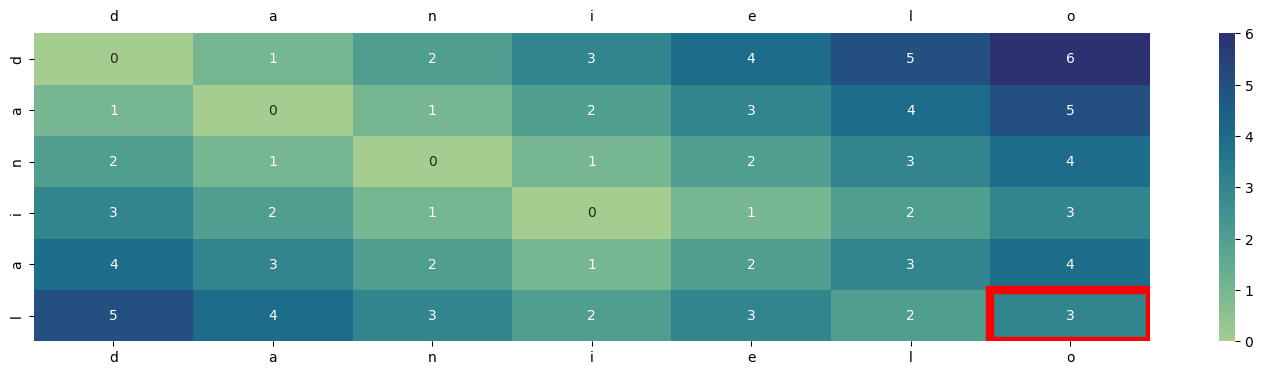

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.pyplot import Rectangle
plt.figure(figsize=(18, 4))
ax = sns.heatmap(df, cmap='crest', annot=True, fmt='g')
ax.tick_params(labeltop=True)
ax.add_patch(Rectangle(
         (y, x),
         1.0,
         1,
         edgecolor='red',
         fill=False,
         lw=6
     ))